## Лабораторная работа 1
### Вариант 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Загрузка данных из файла
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Замена всех нулевых значений на медианные, для всех столбцов кроме результата и кол-ва беременностей
empty_cols = [column for column in diabetes_data.columns if column not in ['Outcome', 'Pregnancies']]
imputer = SimpleImputer(missing_values=0, strategy='median')
transformer = ColumnTransformer(
    [('impute', imputer, empty_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
transformer.set_output(transform='pandas')  #Выводим в таблицу, а не в массив

non_empty_data = transformer.fit_transform(diabetes_data)
non_empty_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1,1


Рассмотрим параметры распределения величин.

In [4]:
non_empty_data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


Разницу на графиках:

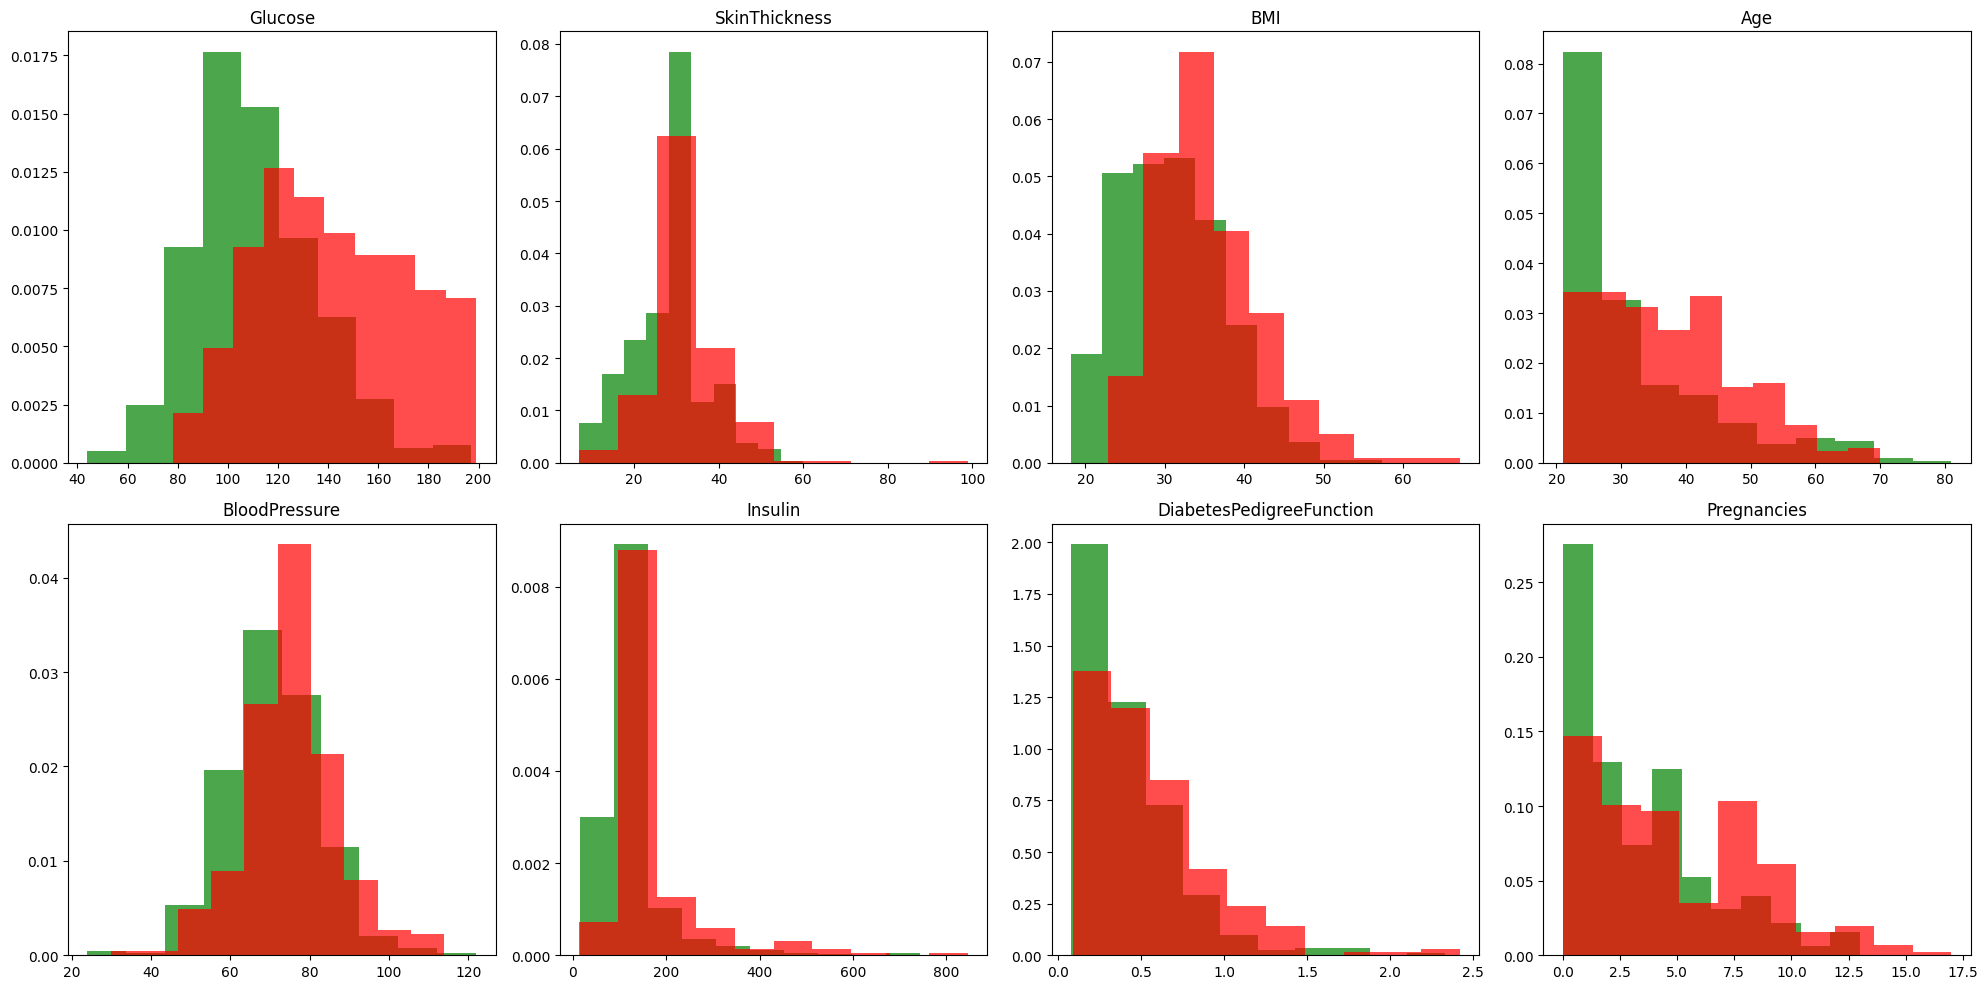

In [5]:
%matplotlib inline

fig, axs = plt.subplots(2, 4, figsize=(20,10))

for i in range(8):
    x = i % 2
    y = i // 2
    series_healthy = non_empty_data[non_empty_data["Outcome"] == 0][non_empty_data.columns[i]]
    series_diabet = non_empty_data[non_empty_data["Outcome"] == 1][non_empty_data.columns[i]]
    
    axs[x, y].hist(series_healthy, color = 'green', alpha = 0.7, density = True, stacked = True)
    axs[x, y].hist(series_diabet, color = 'red', alpha = 0.7, density = True, stacked = True)
    axs[x, y].set_title(non_empty_data.columns[i])
fig.tight_layout()
plt.show()

In [6]:
corr_matrix = non_empty_data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

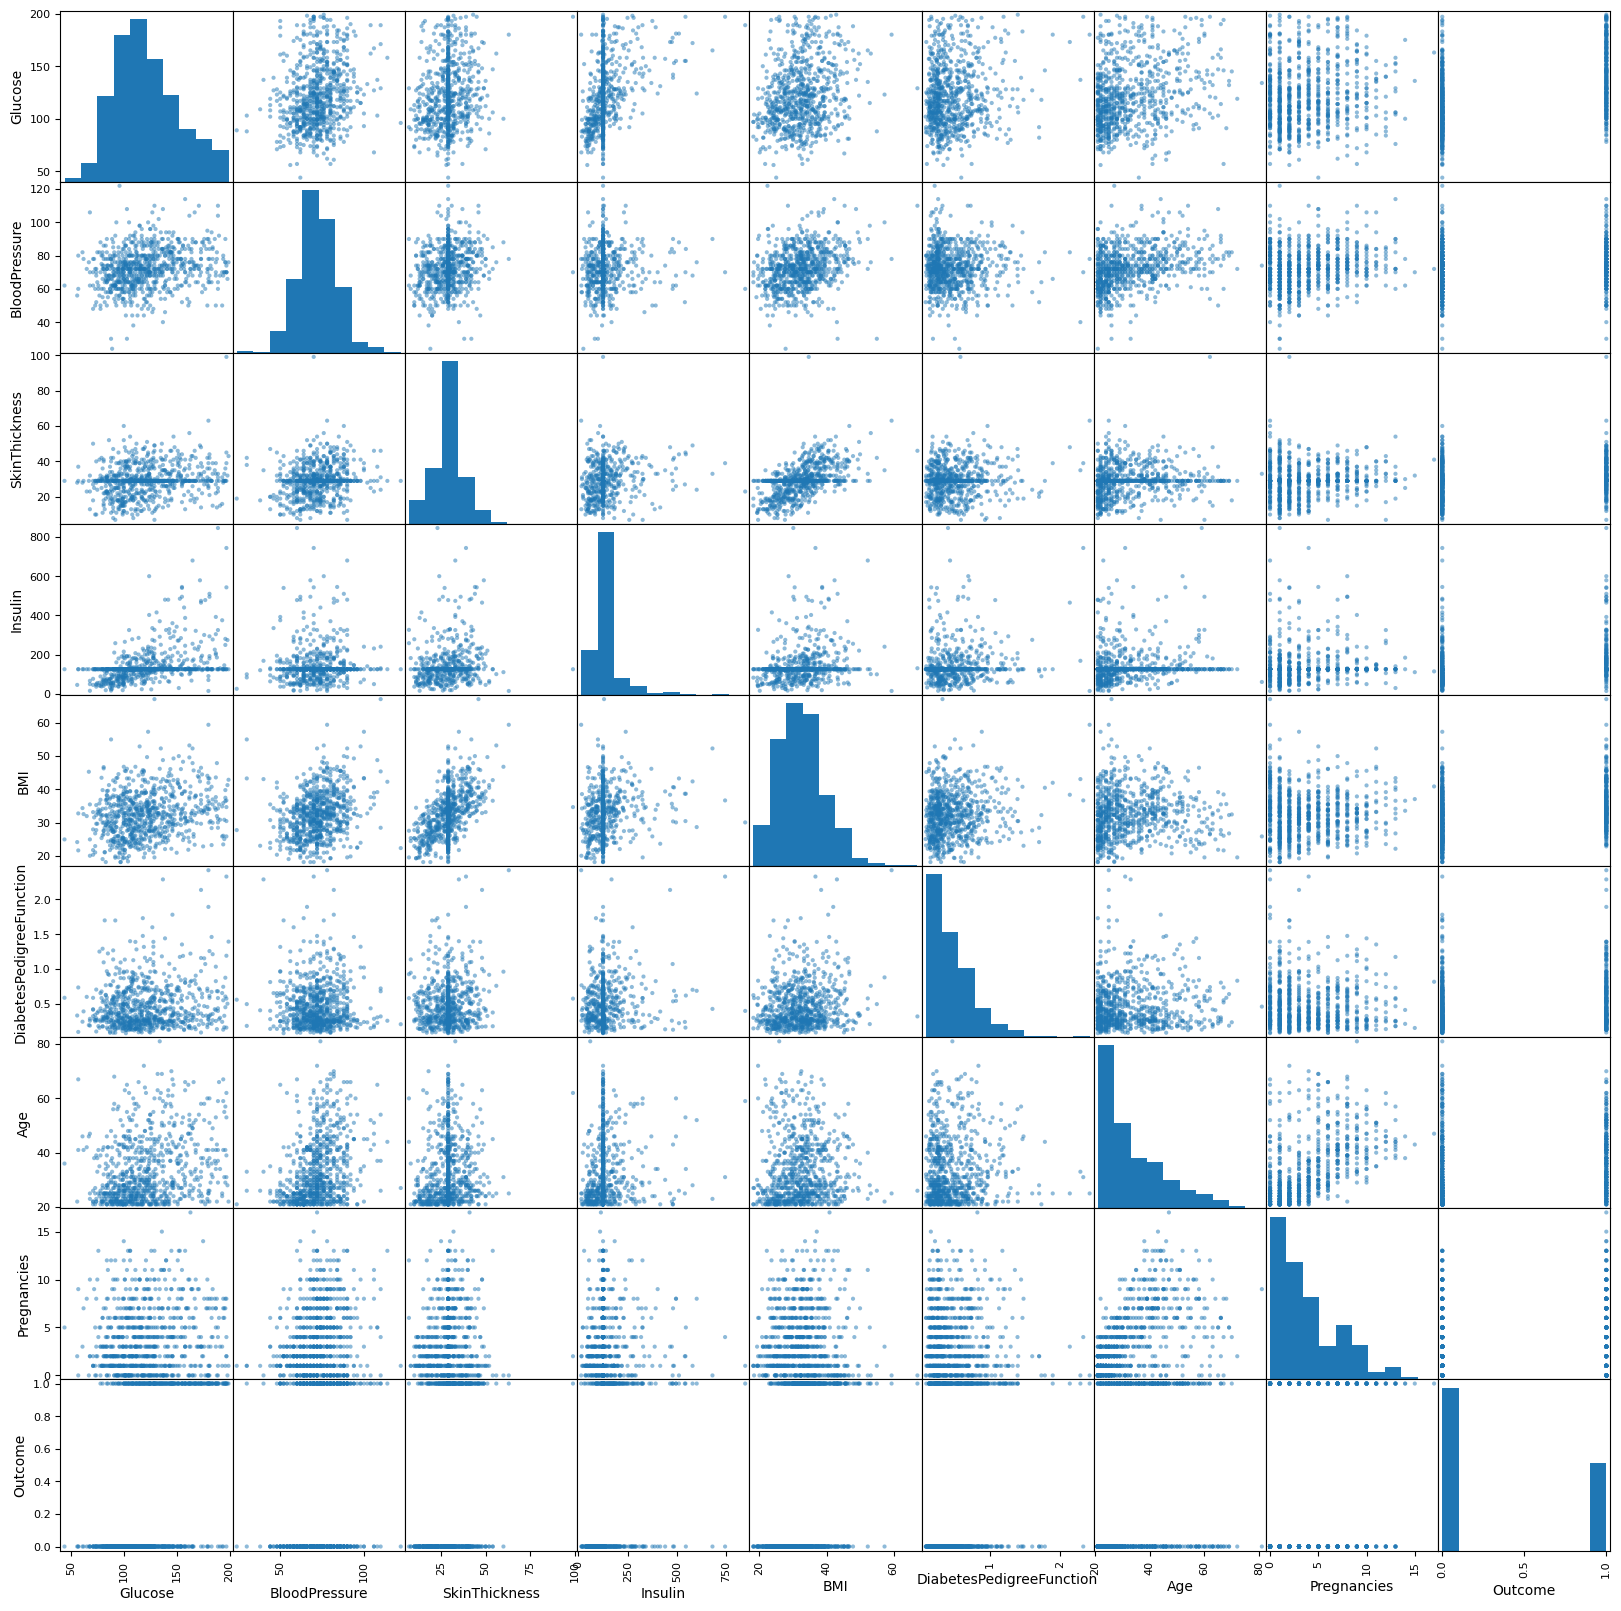

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(non_empty_data,figsize=(20,20))
plt.show()

Можно заметить формирование "полосок" на графиках. Для некоторых графиков это обусловлено характером данных - к примеру, количество беременностей или возраст имеют целочисленные значения. Для других же данных такие полоски обусловлены большим количество пропусков, которые на предыдщих шагах были заменены на медианные значения. 

Алгоритмы зачастую работают лучше с данными, приведенными к определенному диапазону. В ```sklearn``` это можно сделать, в частности, с помощью ```StandardScaler```.

c:\Users\xomaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\xomaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\xomaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


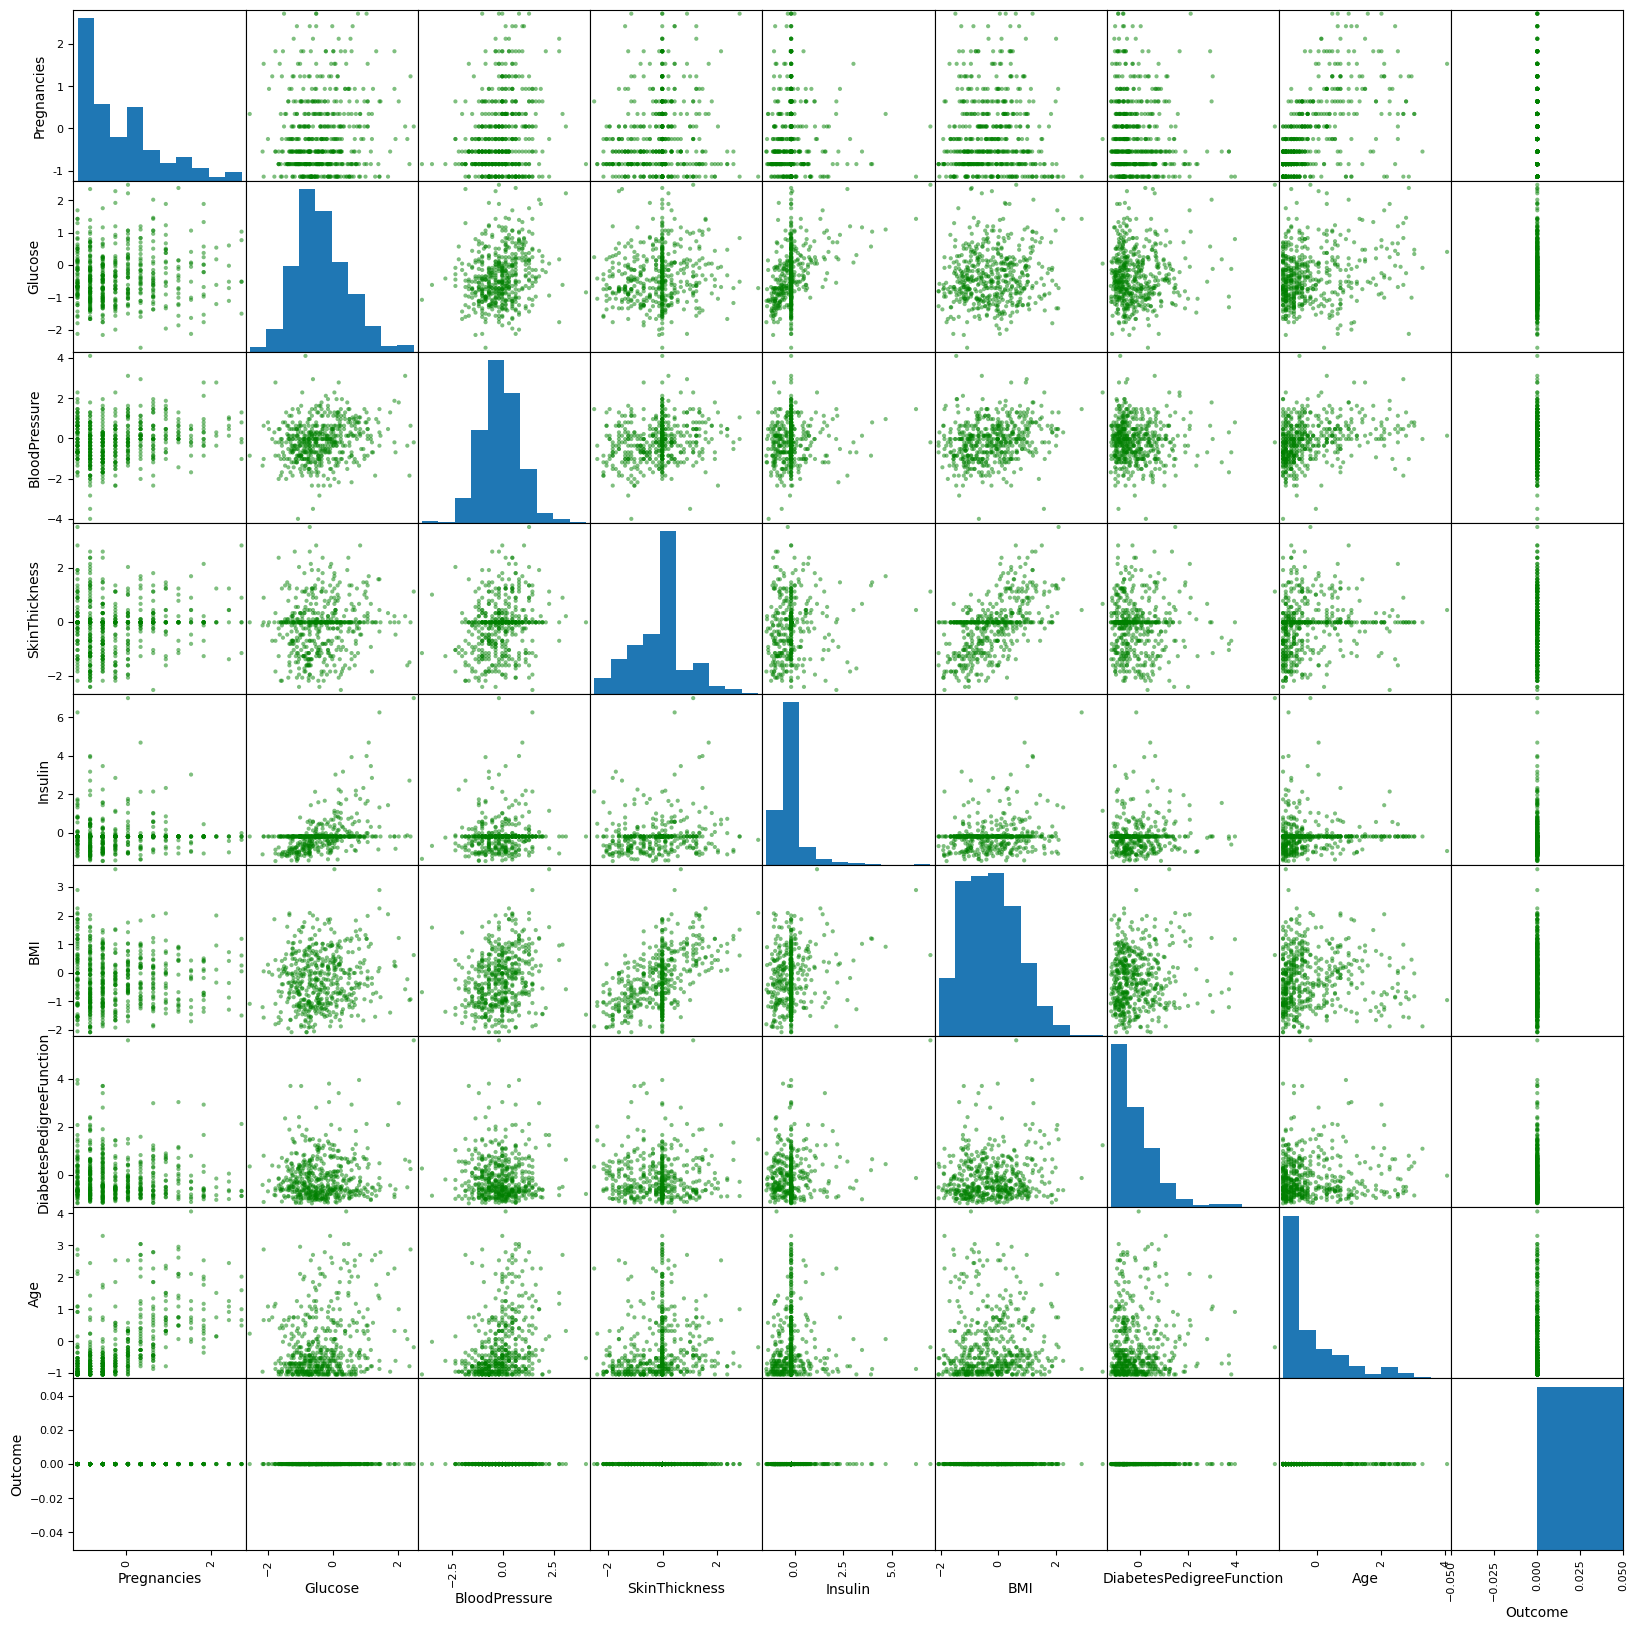

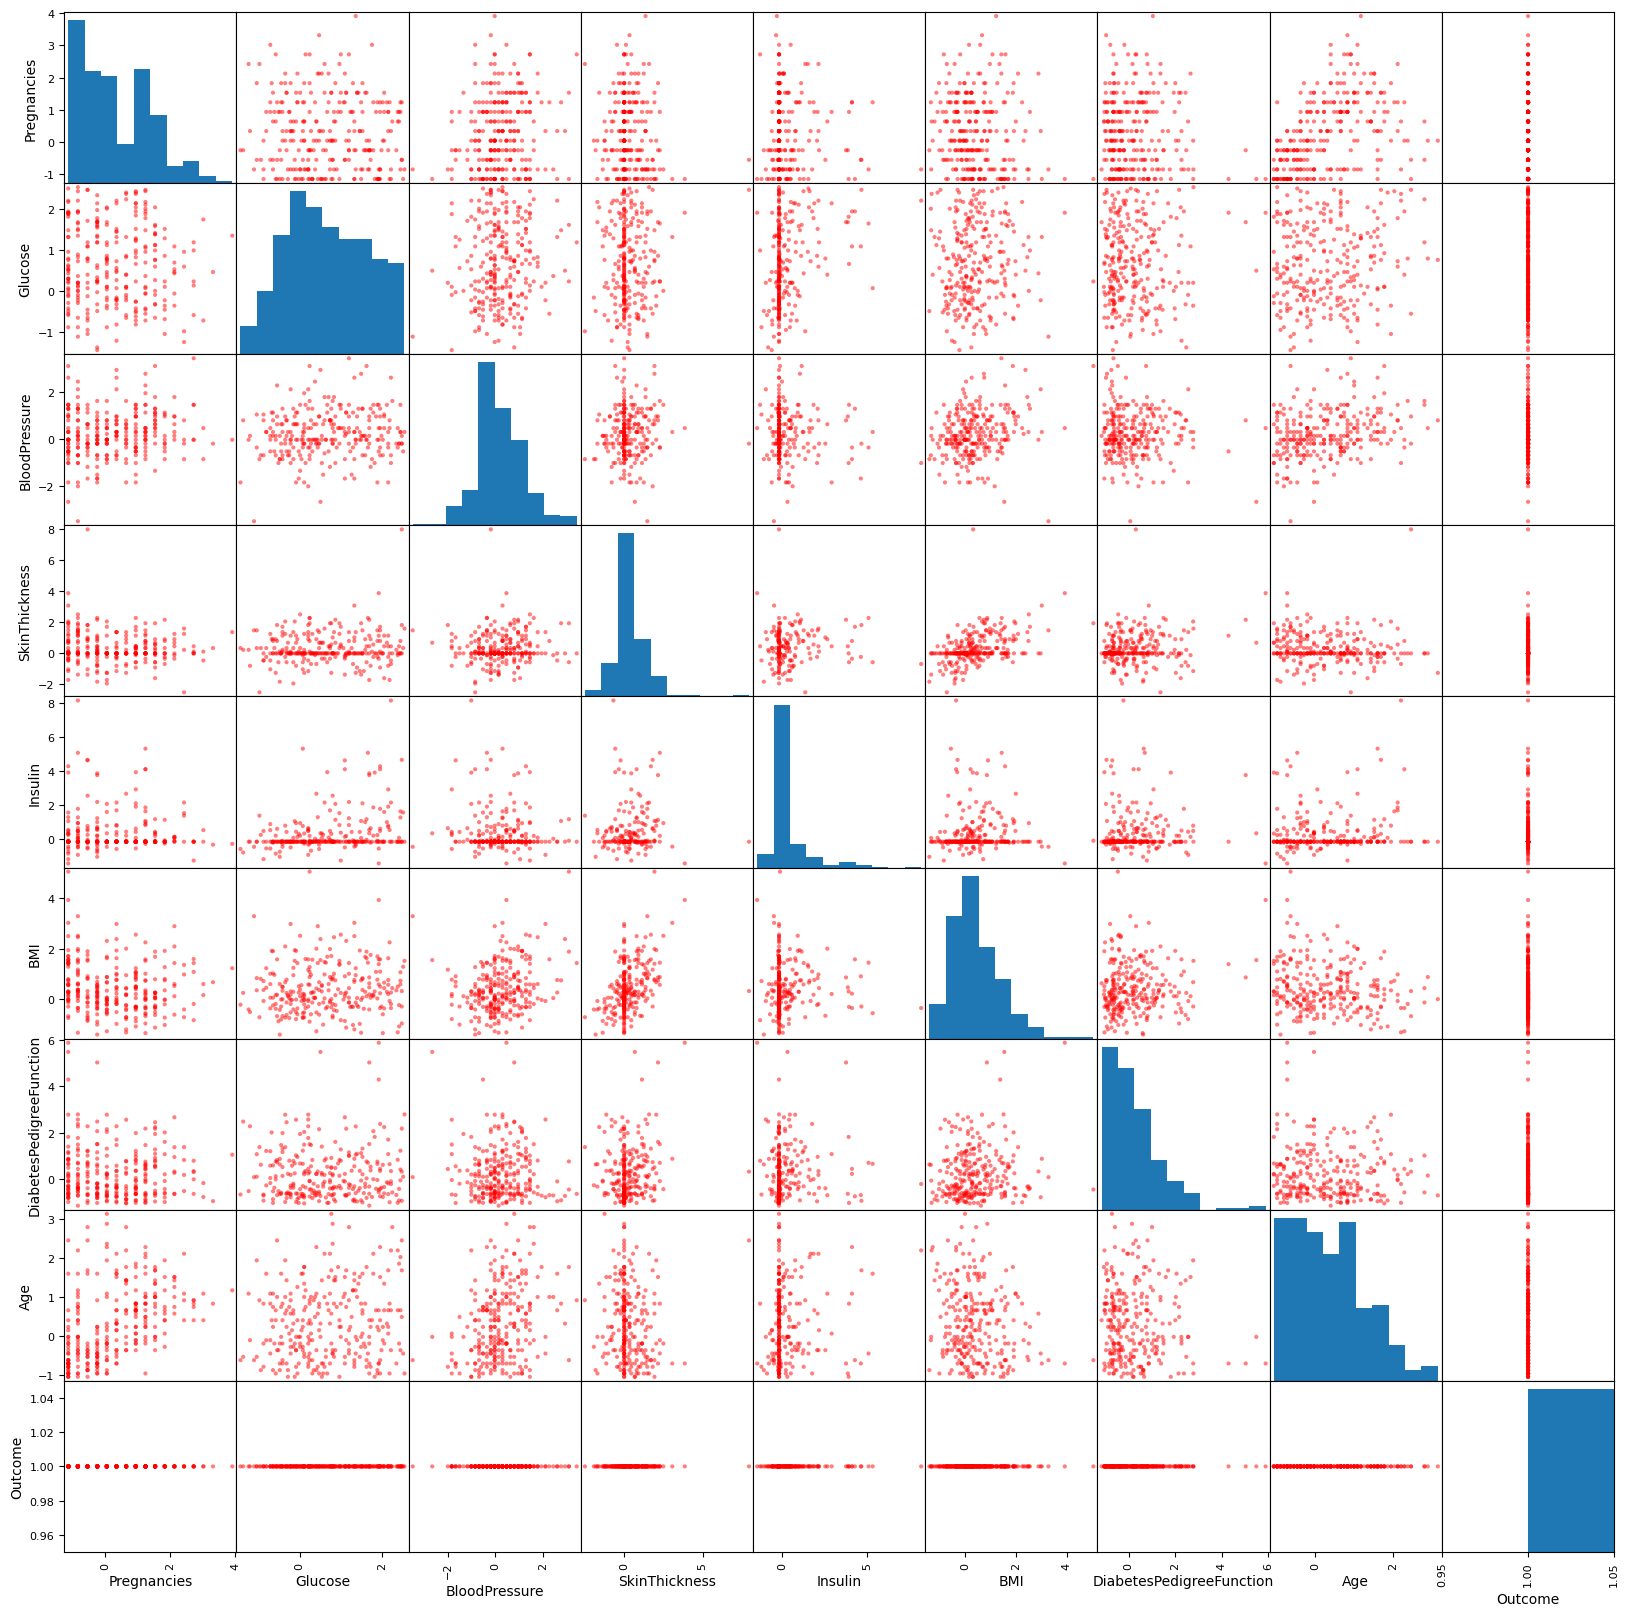

In [9]:
from sklearn.preprocessing import StandardScaler

non_id_cols = [column for column in diabetes_data.columns if column != 'Outcome']

scaler = StandardScaler()
transformer = ColumnTransformer(
    [('scale', scaler, non_id_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
transformer.set_output(transform='pandas')  #Выводим в таблицу, а не в массив

ready_data = transformer.fit_transform(non_empty_data)

scatter_matrix(ready_data[ready_data["Outcome"] == 0],figsize=(20,20),color='green')
scatter_matrix(ready_data[ready_data["Outcome"] == 1],figsize=(20,20),color='red')

plt.show()


В итоге данной лабораторной работы мною были обработаны и проанализированы исходные данные, на основе которых можно сказать, что данный датасет не слишком хорошо подходит для построения модели по следующим причинам:
 - малый размер - 700-800 записей недостаточно для построения точной модели
 - дискретные параметры - к примеру, возраст было бы лучше получить в формате float, а не int, как сейчас
 - слабая зависимость между параметрами - максимальный коэффициент корреляции не превышает 0.5, данные очень сильно разрознены и не формируют четких зависимостей 
 - большое количество пустых ячеек - в связи с чем на графиках и заметны четкие полосы, проходящие по медиане
Все эти свойства датасета, скорее всего, приведут к низкому качеству итоговых моделей.